
### ANN --

* Study 
    - https://www.asimovinstitute.org/neural-network-zoo/
    - https://www.ibm.com/topics/recurrent-neural-networks
    - https://colah.github.io/posts/2015-08-Understanding-LSTMs/
    - https://www.turing.com/kb/comprehensive-guide-to-lstm-rnn
    - https://www.pluralsight.com/guides/introduction-to-lstm-units-in-rnn
    - https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/



 - Perceptron 
 - Multi Layer Perceptron --- MLP



##### SEQUENCE MODELS----Recurrent NN ---->>> Long Short TM 

* NLP : Natural langugage processing
    - NLU
    - NLG

* BOTS
    - CHATBOTS , Question Answer Machine , REGEX-- us/usa/U.S.A. ---> POS tagging
    - VOICEBOTS

###### Refer Some Great Work here --
* Google DEEPMIND -- BARD AI using Language Model for Dialogue Applications (LaMDA)
* OPEN AI -- CHATGPT using GPT-3  -- https://chat.openai.com/chat
  

  
IMAGE ANALYSIS------ 

* Model Name --> Convolutional NN == CNN == DCN

    - object detection
    - object identification/recognition
    - object segmentation
    - image classification
    - VIDEO analytics--- images frame by frame


Refer Some Great Work here --
* Google DEEPMIND
* OPEN AI -- DALL-E -  https://labs.openai.com/
* DEEPFAKE - https://deepfakesweb.com/







HYBRID MODELS
* CNN + RNN

* NEURALINK - https://www.youtube.com/watch?v=Gv_XB6Hf6gM&t=212s







    
    
Hardware Needs    -- 
    
* CPU   
* GPU
* TPU

# ----------------------------------------------------------------------------

In [2]:
# LSTM for international airline passengers problem with regression framing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [3]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
import site
site.getsitepackages()


['C:\\Users\\admin\\anaconda3',
 'C:\\Users\\admin\\anaconda3\\lib\\site-packages']

In [5]:
#pip install keras
#pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [49]:
# fix random seed for reproducibility

np.random.seed(7)
# load the dataset

dataframe  = pd.read_csv('international-airline-passengers.csv',usecols=[1], engine='python', header=None)
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe.columns = ["c1"]
dataframe

,c1
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [46]:
??pd.read_csv

In [9]:
#converting data into float but not mandatory
dataset = dataframe.values
dataset = dataset.astype('float32')

dataset

array([[118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [302.],
       [29

In [10]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [11]:
# split into train and test sets

train_size = int(len(dataset) * 0.67)

test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [12]:
train

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [13]:
test

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.633

In [14]:
# reshape into X=t and Y=t+1

look_back = 1

trainX, trainY = create_dataset(train, look_back)

trainX

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [15]:
trainY

array([0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
       0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703,
       0.02123553, 0.04247104, 0.07142857, 0.05984557, 0.04054055,
       0.08687258, 0.12741312, 0.12741312, 0.10424709, 0.05598456,
       0.01930502, 0.06949806, 0.07915059, 0.08880308, 0.14285713,
       0.11389962, 0.13127413, 0.14285713, 0.18339768, 0.18339768,
       0.15444016, 0.11196911, 0.08108109, 0.1196911 , 0.12934363,
       0.14671814, 0.17181468, 0.14864865, 0.15250966, 0.22007722,
       0.24324325, 0.26640925, 0.2027027 , 0.16795367, 0.13127413,
       0.17374519, 0.17760617, 0.17760617, 0.25482625, 0.25289574,
       0.24131274, 0.26833975, 0.3088803 , 0.32432434, 0.25675675,
       0.20656371, 0.14671814, 0.18725869, 0.19305018, 0.16216215,
       0.25289574, 0.23745173, 0.25096524, 0.3088803 , 0.38223937,
       0.36486486, 0.2992278 , 0.24131274, 0.1911197 , 0.24131274,
       0.26640925, 0.24903473, 0.31467178, 0.3185328 , 0.32046


# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))


In [16]:
testX, testY = create_dataset(test, look_back)



testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [17]:
testX

array([[0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ]], dtype=float32)

In [18]:
#FEED FORWARD NETWORK 

#BACK PROPAGATION PROCESS -- weight adjustments

In [98]:
pd.read_csv('AirPassengers.csv')

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [85]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(4, input_shape=(1, look_back)))#adding LSTM layer that has 4 neurons can use 4 or 1 up to you, lookback is t-1, t-2...

model.add(Dense(1)) #output layer

model.compile(loss='mean_squared_error', 
              optimizer='adam')


In [104]:
model.layers[0].activation

<function keras.activations.tanh(x)>

In [55]:
model.layers[1].activation

<function keras.activations.linear(x)>

In [69]:
trainY_new = trainY.flatten().reshape(93,1)

In [86]:
model.fit(trainX, trainY_new, 
          epochs=100, 
          batch_size=1, 
          verbose=2)


Epoch 1/100
93/93 - 2s - loss: 51095.3672 - 2s/epoch - 18ms/step
Epoch 2/100
93/93 - 0s - loss: 51038.9336 - 171ms/epoch - 2ms/step
Epoch 3/100
93/93 - 0s - loss: 50975.5820 - 173ms/epoch - 2ms/step
Epoch 4/100
93/93 - 0s - loss: 50904.9883 - 157ms/epoch - 2ms/step
Epoch 5/100
93/93 - 0s - loss: 50826.9023 - 183ms/epoch - 2ms/step
Epoch 6/100
93/93 - 0s - loss: 50742.8867 - 176ms/epoch - 2ms/step
Epoch 7/100
93/93 - 0s - loss: 50654.4414 - 177ms/epoch - 2ms/step
Epoch 8/100
93/93 - 0s - loss: 50563.1758 - 165ms/epoch - 2ms/step
Epoch 9/100
93/93 - 0s - loss: 50470.5430 - 174ms/epoch - 2ms/step
Epoch 10/100
93/93 - 0s - loss: 50377.2148 - 177ms/epoch - 2ms/step
Epoch 11/100
93/93 - 0s - loss: 50284.2383 - 186ms/epoch - 2ms/step
Epoch 12/100
93/93 - 0s - loss: 50192.1016 - 167ms/epoch - 2ms/step
Epoch 13/100
93/93 - 0s - loss: 50100.9531 - 188ms/epoch - 2ms/step
Epoch 14/100
93/93 - 0s - loss: 50011.1992 - 188ms/epoch - 2ms/step
Epoch 15/100
93/93 - 0s - loss: 49922.7734 - 166ms/epoch - 

In [71]:
model.layers

In [72]:
model.weights

[<tf.Variable 'lstm_2/lstm_cell_2/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[ 4.0278783 , -0.55292517, -1.909154  ,  5.568819  ]],
       dtype=float32)>,
 <tf.Variable 'lstm_2/lstm_cell_2/recurrent_kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[ 0.12082171,  0.3923387 , -0.44623896,  0.7952001 ]],
       dtype=float32)>,
 <tf.Variable 'lstm_2/lstm_cell_2/bias:0' shape=(4,) dtype=float32, numpy=array([ 6.009555 ,  1.       , -4.093583 ,  6.2540717], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-10.290745]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([8.743254], dtype=float32)>]

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4)                 96        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


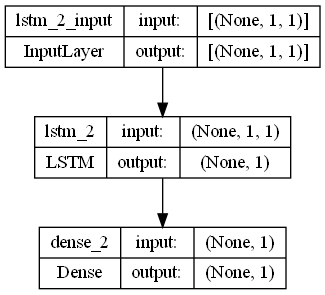

In [74]:
from keras.utils import plot_model

plot_model(model, to_file='TS_LSTM_model.png', show_shapes=True, show_layer_names=True)


In [25]:
# make predictions

trainPredict = model.predict(trainX)
trainPredict

3/3 [==============================] - 1s 3ms/step


array([[0.04668403],
       [0.07066141],
       [0.06549463],
       [0.05179277],
       [0.07584339],
       [0.09846655],
       [0.09846655],
       [0.07757403],
       [0.04838513],
       [0.02306552],
       [0.04668403],
       [0.04159176],
       [0.06034326],
       [0.08625162],
       [0.07584339],
       [0.05862963],
       [0.10021769],
       [0.13731946],
       [0.13731946],
       [0.11604375],
       [0.07238707],
       [0.03989803],
       [0.08451287],
       [0.09322233],
       [0.10197031],
       [0.15160483],
       [0.1248854 ],
       [0.14088352],
       [0.15160483],
       [0.18944103],
       [0.18944103],
       [0.16236794],
       [0.12311435],
       [0.09496889],
       [0.1302065 ],
       [0.13910085],
       [0.15518804],
       [0.17858507],
       [0.15698133],
       [0.16057129],
       [0.22402021],
       [0.24598943],
       [0.26803327],
       [0.20760529],
       [0.17497411],
       [0.14088352],
       [0.18039206],
       [0.184

In [26]:
testPredict = model.predict(testX)

testPredict

2/2 [==============================] - 0s 4ms/step


array([[0.40250364],
       [0.37678382],
       [0.47714716],
       [0.46268415],
       [0.47534248],
       [0.5937543 ],
       [0.6663919 ],
       [0.6696953 ],
       [0.562502  ],
       [0.46087232],
       [0.38414064],
       [0.44088855],
       [0.44816637],
       [0.4080032 ],
       [0.48795542],
       [0.46268415],
       [0.48975334],
       [0.616028  ],
       [0.7087787 ],
       [0.7310872 ],
       [0.562502  ],
       [0.4825557 ],
       [0.3933278 ],
       [0.44270918],
       [0.48435655],
       [0.45180067],
       [0.5659971 ],
       [0.5484686 ],
       [0.5903049 ],
       [0.67792296],
       [0.7972379 ],
       [0.81357014],
       [0.6630815 ],
       [0.5677426 ],
       [0.4879554 ],
       [0.56425023],
       [0.58511966],
       [0.5396554 ],
       [0.5885779 ],
       [0.6597642 ],
       [0.67792296],
       [0.7776232 ],
       [0.9023674 ],
       [0.8805837 ],
       [0.7358192 ],
       [0.6597642 ]], dtype=float32)

In [27]:
# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)

In [28]:
trainPredict

array([[128.18233],
       [140.6026 ],
       [137.92622],
       [130.82866],
       [143.28688],
       [155.00568],
       [155.00568],
       [144.18335],
       [129.06349],
       [115.94794],
       [128.18233],
       [125.54453],
       [135.25781],
       [148.67834],
       [143.28688],
       [134.37015],
       [155.91275],
       [175.13148],
       [175.13148],
       [164.11066],
       [141.4965 ],
       [124.66718],
       [147.77766],
       [152.28918],
       [156.82062],
       [182.53131],
       [168.69064],
       [176.97768],
       [182.53131],
       [202.13045],
       [202.13045],
       [188.1066 ],
       [167.77324],
       [153.19388],
       [171.44696],
       [176.05424],
       [184.3874 ],
       [196.50708],
       [185.31633],
       [187.17593],
       [220.04247],
       [231.42252],
       [242.84123],
       [211.53954],
       [194.6366 ],
       [176.97768],
       [197.44308],
       [199.31656],
       [199.31656],
       [237.12775],


In [29]:
trainY = scaler.inverse_transform([trainY])
trainY

array([[131.99999879, 129.00000163, 120.99999632, 135.00000368,
        147.99999397, 147.99999397, 136.00000531, 119.00000078,
        103.99999952, 117.99999916, 115.00000199, 125.99999674,
        140.99999801, 135.00000368, 125.00000283, 148.9999956 ,
        169.99999891, 169.99999891, 157.99999481, 133.00000042,
        114.00000036, 139.99999638, 145.00000452, 149.99999723,
        177.9999965 , 163.00000295, 172.00000217, 177.9999965 ,
        198.99999982, 198.99999982, 184.00000627, 162.00000133,
        146.00000615, 165.9999924 , 171.00000054, 179.99999976,
        193.00000549, 181.00000139, 183.00000464, 217.99999988,
        230.00000398, 241.99999264, 209.00000066, 191.00000223,
        172.00000217, 194.00000712, 195.99999493, 195.99999493,
        235.99999831, 234.99999668, 229.00000235, 242.99999427,
        263.99999759, 272.00001061, 236.99999994, 211.00000392,
        179.99999976, 201.00000308, 203.99999252, 187.99999735,
        234.99999668, 226.9999991 , 233.

In [30]:
testPredict = scaler.inverse_transform(testPredict)

testPredict

array([[312.4969 ],
       [299.174  ],
       [351.16226],
       [343.67038],
       [350.22742],
       [411.56473],
       [449.19104],
       [450.9022 ],
       [395.37604],
       [342.73187],
       [302.98486],
       [332.38028],
       [336.15018],
       [315.34564],
       [356.76093],
       [343.67038],
       [357.69223],
       [423.10254],
       [471.14737],
       [482.70316],
       [395.37604],
       [353.96387],
       [307.7438 ],
       [333.32336],
       [354.8967 ],
       [338.03275],
       [397.1865 ],
       [388.10672],
       [409.77795],
       [455.1641 ],
       [516.96924],
       [525.4293 ],
       [447.47623],
       [398.09064],
       [356.76093],
       [396.28162],
       [407.092  ],
       [383.5415 ],
       [408.8834 ],
       [445.75784],
       [455.1641 ],
       [506.8088 ],
       [571.42633],
       [560.1424 ],
       [485.15436],
       [445.75784]], dtype=float32)

In [31]:
testY = scaler.inverse_transform([testY])
testY

array([[301.00001152, 355.999993  , 348.00001085, 355.00000681,
        421.9999924 , 465.0000161 , 466.99998848, 403.99999397,
        346.99999379, 304.99998716, 335.99999132, 339.99999783,
        317.99999288, 362.00000277, 348.00001085, 362.99998896,
        434.99999813, 491.00002756, 505.00001948, 403.99999397,
        359.00001333, 310.00001073, 337.00000838, 359.99999952,
        342.00000109, 406.0000281 , 395.99998094, 420.00002002,
        471.99998119, 548.00004318, 559.00001477, 462.99998197,
        407.00001429, 362.00000277, 404.99998016, 416.9999997 ,
        390.99998824, 418.99997208, 461.00000959, 471.99998119,
        535.00003745, 622.00000929, 606.00004499, 507.99997805,
        461.00000959, 390.00000205]])

In [32]:
# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 22.91 RMSE


In [33]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print('Test Score: %.2f RMSE' % (testScore))

Test Score: 48.11 RMSE


In [34]:
np.empty_like([2, 2,22], dtype = int)

array([         0,          0, 1005949392])

In [35]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot

array([[0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.177

In [36]:
trainPredictPlot[:, :] = np.nan

trainPredictPlot

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [37]:
trainPredict

array([[128.18233],
       [140.6026 ],
       [137.92622],
       [130.82866],
       [143.28688],
       [155.00568],
       [155.00568],
       [144.18335],
       [129.06349],
       [115.94794],
       [128.18233],
       [125.54453],
       [135.25781],
       [148.67834],
       [143.28688],
       [134.37015],
       [155.91275],
       [175.13148],
       [175.13148],
       [164.11066],
       [141.4965 ],
       [124.66718],
       [147.77766],
       [152.28918],
       [156.82062],
       [182.53131],
       [168.69064],
       [176.97768],
       [182.53131],
       [202.13045],
       [202.13045],
       [188.1066 ],
       [167.77324],
       [153.19388],
       [171.44696],
       [176.05424],
       [184.3874 ],
       [196.50708],
       [185.31633],
       [187.17593],
       [220.04247],
       [231.42252],
       [242.84123],
       [211.53954],
       [194.6366 ],
       [176.97768],
       [197.44308],
       [199.31656],
       [199.31656],
       [237.12775],


In [38]:
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

trainPredictPlot

array([[      nan],
       [128.18233],
       [140.6026 ],
       [137.92622],
       [130.82866],
       [143.28688],
       [155.00568],
       [155.00568],
       [144.18335],
       [129.06349],
       [115.94794],
       [128.18233],
       [125.54453],
       [135.25781],
       [148.67834],
       [143.28688],
       [134.37015],
       [155.91275],
       [175.13148],
       [175.13148],
       [164.11066],
       [141.4965 ],
       [124.66718],
       [147.77766],
       [152.28918],
       [156.82062],
       [182.53131],
       [168.69064],
       [176.97768],
       [182.53131],
       [202.13045],
       [202.13045],
       [188.1066 ],
       [167.77324],
       [153.19388],
       [171.44696],
       [176.05424],
       [184.3874 ],
       [196.50708],
       [185.31633],
       [187.17593],
       [220.04247],
       [231.42252],
       [242.84123],
       [211.53954],
       [194.6366 ],
       [176.97768],
       [197.44308],
       [199.31656],
       [199.31656],


In [39]:
trainPredict

array([[128.18233],
       [140.6026 ],
       [137.92622],
       [130.82866],
       [143.28688],
       [155.00568],
       [155.00568],
       [144.18335],
       [129.06349],
       [115.94794],
       [128.18233],
       [125.54453],
       [135.25781],
       [148.67834],
       [143.28688],
       [134.37015],
       [155.91275],
       [175.13148],
       [175.13148],
       [164.11066],
       [141.4965 ],
       [124.66718],
       [147.77766],
       [152.28918],
       [156.82062],
       [182.53131],
       [168.69064],
       [176.97768],
       [182.53131],
       [202.13045],
       [202.13045],
       [188.1066 ],
       [167.77324],
       [153.19388],
       [171.44696],
       [176.05424],
       [184.3874 ],
       [196.50708],
       [185.31633],
       [187.17593],
       [220.04247],
       [231.42252],
       [242.84123],
       [211.53954],
       [194.6366 ],
       [176.97768],
       [197.44308],
       [199.31656],
       [199.31656],
       [237.12775],


In [40]:
# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)

testPredictPlot[:, :] = np.nan

testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


In [41]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


In [42]:
# shift test predictions for plotting

testPredictPlotY = np.empty_like(dataset)

testPredictPlotY[:, :] = np.nan

testPredictPlotY[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testY.reshape(46,1)
testPredictPlotY

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


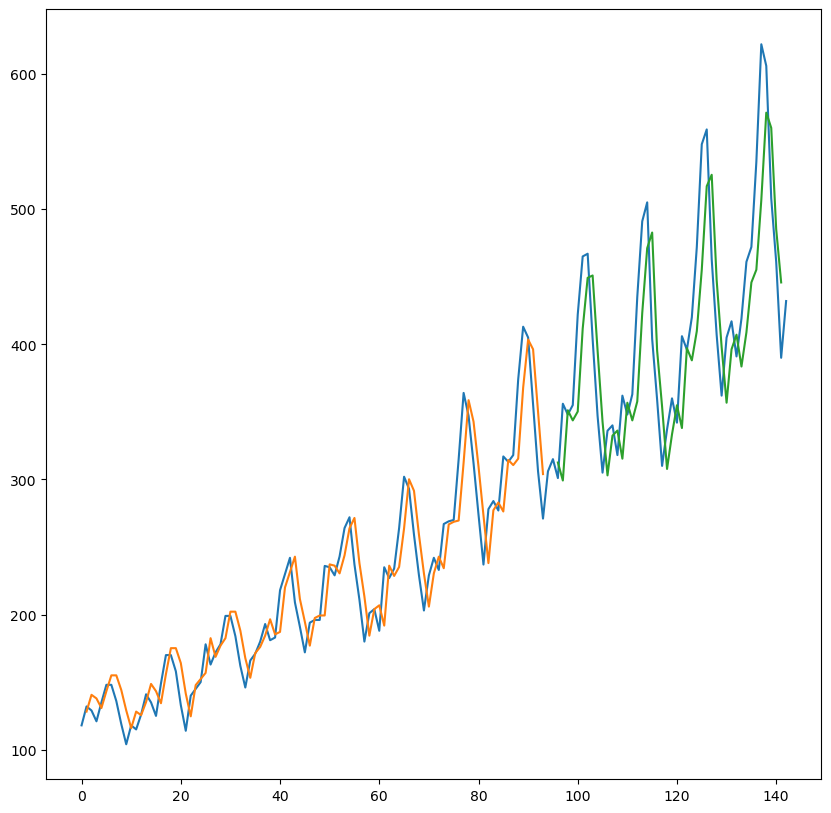

In [43]:
# plot baseline and predictions

plt.figure(figsize=(10,10))

plt.plot(scaler.inverse_transform(dataset))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.plot(testPredictPlotY)

plt.show()

We can see the model is very good model to predict the output.